In [31]:
#We have chosen the Heart Disease Dataset for Data Preprocessing,
# it includes clinical and demographic information of patients 
#and also includes both numerical and categorical attributes.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg","thalach",
    "exang","oldpeak","slope","ca","thal","target"
]

df = pd.read_csv(url, header=None, names=columns)

print("Dataset Loaded Successfully")
df.head()


Dataset Loaded Successfully


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
#HANDLING MISSING VALUES
import numpy as np
df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric)
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [33]:
df.fillna(df.median(), inplace=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [34]:
# Convert target to 0 and 1 as the final result is No Cancer or Cancer
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

print(df["target"].value_counts())


target
0    164
1    139
Name: count, dtype: int64


In [35]:
# Scaling Numerical Features

from sklearn.preprocessing import StandardScaler
num_features = df.drop("target", axis=1)

scaler = StandardScaler()
df_zscore = scaler.fit_transform(num_features)

df_zscore = pd.DataFrame(df_zscore, columns=num_features.columns)
df_zscore.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.660004
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.890238
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.176752
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.890238
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.890238


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(num_features)

df_minmax = pd.DataFrame(df_minmax, columns=num_features.columns)
df_minmax.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00


In [ ]:
#Z-score Standardization
#Mean is 0, Standard Deviation is 1
#Works fine with normally distributed Data

#Min-Max Normalization
#Scales data between 0 and 1
#Sensitive to outliers

In [ ]:
#HANDLING NOISE
# We are selecting the Serum Cholesterol feature which is 'chol' in the dataset

feature = df["chol"].copy()


In [39]:
#Injecting noise
np.random.seed(42)
noise = np.random.normal(0, 10, size=len(feature))
feature_noisy = feature + noise


In [40]:
#Smoothing(Rolling Mean)
feature_smooth = feature_noisy.rolling(window=5).mean()


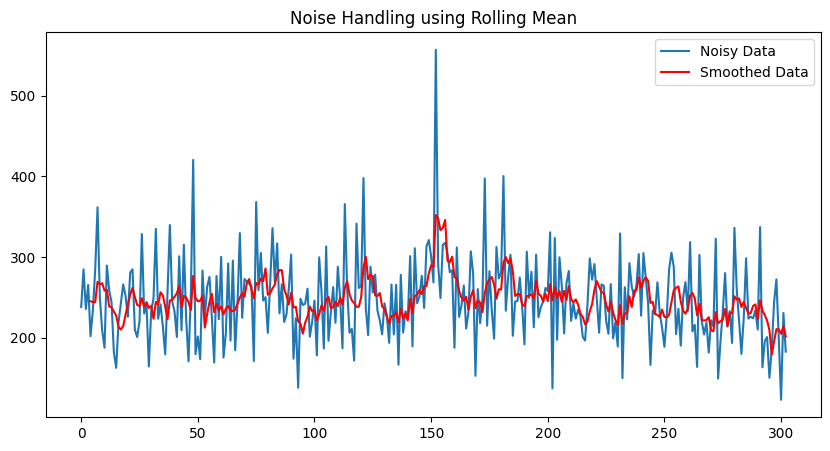

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(feature_noisy, label="Noisy Data")
plt.plot(feature_smooth, label="Smoothed Data", color="red")
plt.legend()
plt.title("Noise Handling using Rolling Mean")
plt.show()



In [42]:
#HANDLING OUTLIERS

from scipy.stats import zscore

z_scores = np.abs(zscore(df["chol"]))
outliers = df[z_scores > 3]   # threshold = 3

print("Number of outliers:", outliers.shape[0])


Number of outliers: 4


In [43]:
df_no_outliers = df[z_scores <= 3]

In [44]:
#Outliers were detected using the Z-score method with a threshold of 3.
#Outliers were removed to reduce their influence on model performance,
#as extreme values can distort machine learning algorithms.

In [46]:
#FEATURE SELECTION

#Filter Method (Correlation)
corr = df.corr()["target"].sort_values(ascending=False)
print(corr)




target      1.000000
thal        0.522057
ca          0.460033
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64


In [ ]:
selected_features = corr[abs(corr) > 0.2].index
print("Selected Features:", selected_features)

#The correlation-based filter method was used because it is simple, 
#computationally efficient, and suitable for small datasets. 
# It helps identify features that have the strongest relationship with the target variable.


Selected Features: Index(['target', 'thal', 'ca', 'exang', 'oldpeak', 'cp', 'slope', 'sex', 'age',
       'thalach'],
      dtype='str')


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#Wrapper Method

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df.drop("target", axis=1)
y = df["target"]

model = LogisticRegression(max_iter=5000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

print("Selected Features:", X.columns[rfe.support_])


#The wrapper method (RFE) was applied to select the most important features for heart disease prediction. 
#The selected features included age, chest pain type, maximum heart rate, oldpeak, and number of major vessels.


Selected Features: Index(['sex', 'cp', 'exang', 'slope', 'ca'], dtype='str')
